#  Task 1

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt  # For change point detection
from statsmodels.tsa.arima.model import ARIMA
#from pmdarima import auto_arima
#import pymc3 as pm

In [87]:
#Load and Prepare Data
data = pd.read_csv('../data/Copy of BrentOilPrices.csv')
data = pd.read_csv('../data/Copy of BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)
data.set_index('Date', inplace=True)
print(data.head())


C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_9816\3905564112.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('../data/Copy of BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)


            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63


In [88]:
data.reset_index(inplace=True)

# Extract year, month, and day features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [89]:
data.isnull().sum()

Date     0
Price    0
Year     0
Month    0
Day      0
dtype: int64

In [90]:
print(data.head())
# Reset the index to bring 'Date' back as a column
data.reset_index(inplace=True)
# Extract year, month, and day features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

        Date  Price  Year  Month  Day
0 1987-05-20  18.63  1987      5   20
1 1987-05-21  18.45  1987      5   21
2 1987-05-22  18.55  1987      5   22
3 1987-05-25  18.60  1987      5   25
4 1987-05-26  18.63  1987      5   26


In [91]:
# Display the first few rows of the dataset
print(data.head())

   index       Date  Price  Year  Month  Day
0      0 1987-05-20  18.63  1987      5   20
1      1 1987-05-21  18.45  1987      5   21
2      2 1987-05-22  18.55  1987      5   22
3      3 1987-05-25  18.60  1987      5   25
4      4 1987-05-26  18.63  1987      5   26


In [92]:
data.dtypes

index             int64
Date     datetime64[ns]
Price           float64
Year              int32
Month             int32
Day               int32
dtype: object

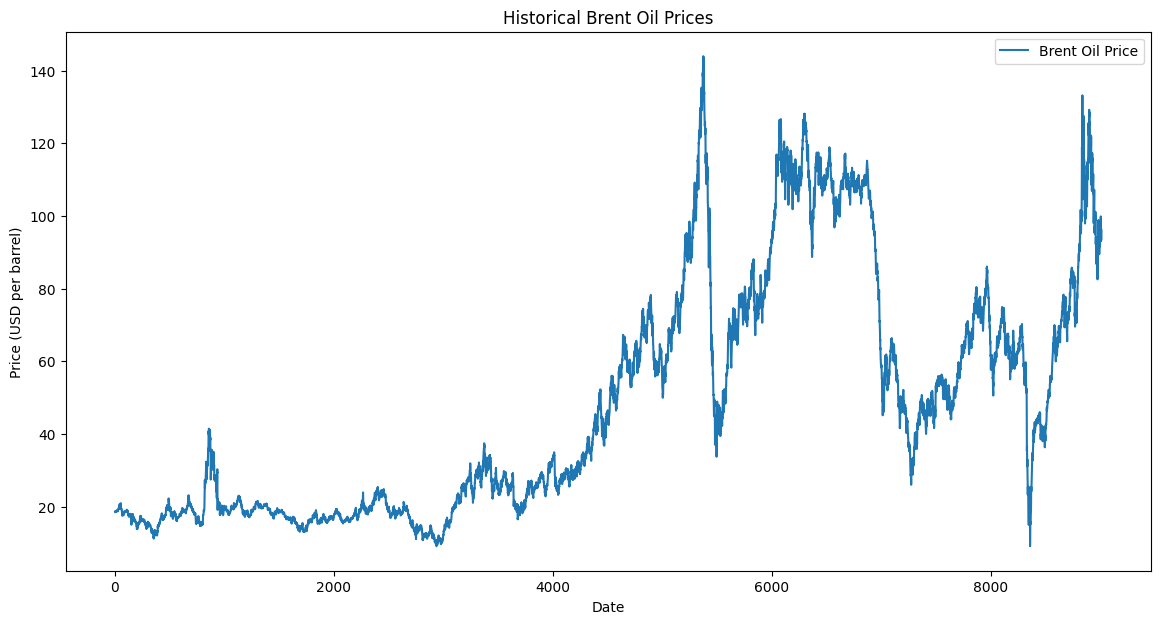

In [93]:
# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(data['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Historical Brent Oil Prices')
plt.legend()
plt.show()

In [94]:
# Change Point Analysis
# Convert the price data to a NumPy array
price_array = data['Price'].values
# Using the Pelt method from ruptures to detect change points
model = "l2"  # Model to use: "l2" for mean change
algo = rpt.Pelt(model=model).fit(price_array)
result = algo.predict(pen=5)  # Penalty value can be adjusted


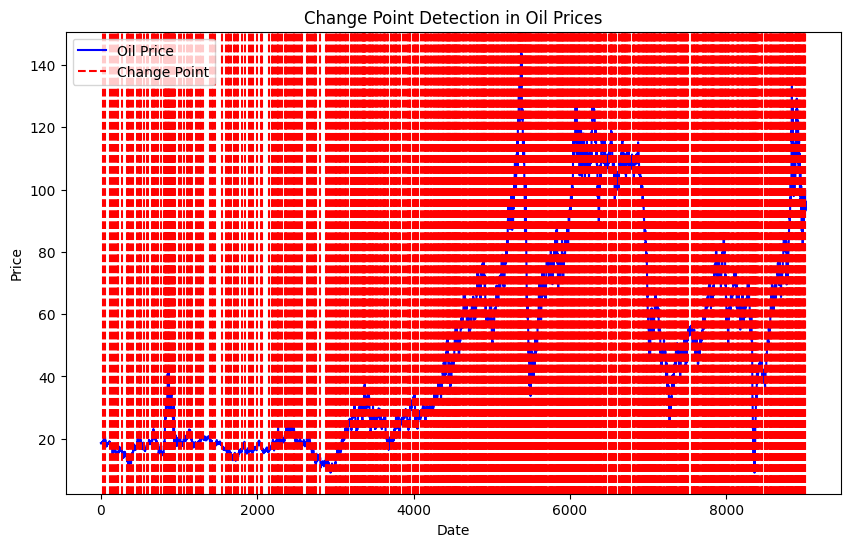

In [95]:
# Plotting the detected change points
plt.figure(figsize=(10, 6))
plt.plot(data['Price'], label='Oil Price', color='blue')
for cp in result:
    plt.axvline(x=data.index[cp-1], color='red', linestyle='--', label='Change Point' if cp == result[0] else "")
plt.title('Change Point Detection in Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [96]:
# Modeling the Time Series Data
# ARIMA model fitting
p = 1  # AR term
d = 1  # Differencing
q = 1  # MA term
# Fit the ARIMA model
model = ARIMA(data['Price'], order=(p, d, q))
model_fit = model.fit()
# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Fri, 01 Nov 2024   AIC                          29093.899
Time:                        20:15:22   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

Last index type: <class 'int'>
Last index value: 9010


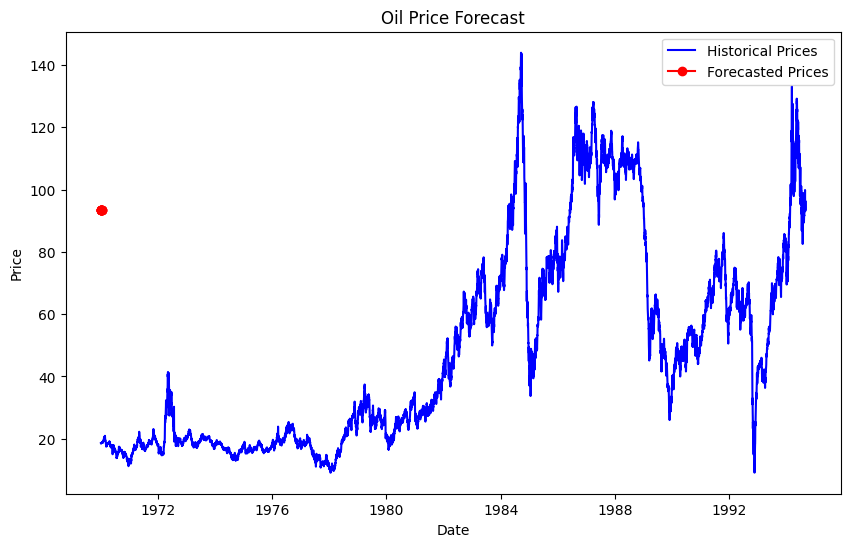

In [97]:
# Forecasting Future Prices
forecast = model_fit.forecast(steps=10)

# Check the last index
last_date = data.index[-1]
print("Last index type:", type(last_date))  # Check type
print("Last index value:", last_date)  # Check value

# Ensure last_date is a Timestamp
if not isinstance(last_date, pd.Timestamp):
    last_date = pd.to_datetime(last_date)

# Create a date range starting from the last date in the dataset
# Ensure that last_date is a Timestamp at this point
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=10)

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Price'], label='Historical Prices', color='blue')
plt.plot(forecast_index, forecast, label='Forecasted Prices', color='red', marker='o')
plt.title('Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

